# practise_chapter_14

## model_seasonality

In [1]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit

series = read_csv(
    "../data/daily-minimum-temperatures.csv", header=0, index_col=0, parse_dates=True
).squeeze()

In [5]:
X = [i % 365 for i in range(0, len(series))]
y = series.values

degree = 4
coef = polyfit(X, y, degree)
print("Coeffieients: %s" % coef)

Coeffieients: [-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01
  1.38980178e+01]


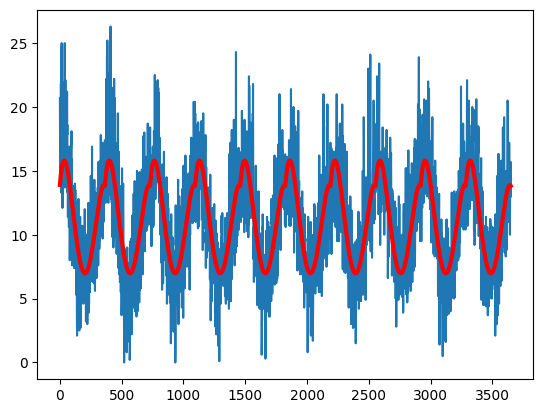

In [6]:
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i] ** (degree - d) * coef[d]
    curve.append(value)
# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color="red", linewidth=3)
pyplot.show()

## differencing_with_monthly

In [11]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit

series = read_csv(
    "../data/daily-minimum-temperatures.csv", header=0, index_col=0, parse_dates=True
).squeeze()

X = series.values
X

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

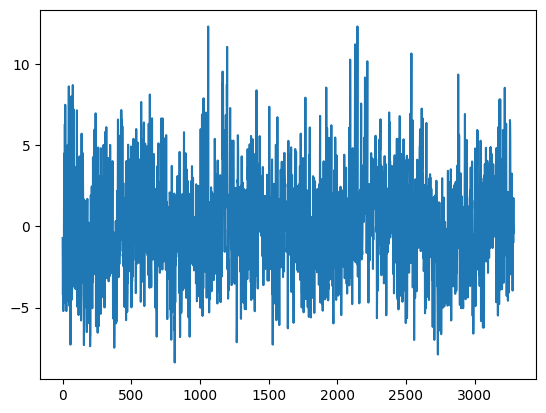

In [14]:
diff = list()
days_in_year = 365

for i in range(days_in_year, len(X)):
    month_str = str(series.index[i].year - 1) + "-" + str(series.index[i].month)
    month_mean_last_year = series[month_str].mean()
    value = X[i] - month_mean_last_year
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

Timestamp('1990-12-31 00:00:00')

## monthly_differenced

## differencing

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# pd.read_csv daily-minimum-temperatures.csv
ds = pd.read_csv(
    "../data/daily-minimum-temperatures.csv", header=0, index_col=0, parse_dates=True
).squeeze()

ds.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Series name: Temp
Non-Null Count  Dtype  
--------------  -----  
3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


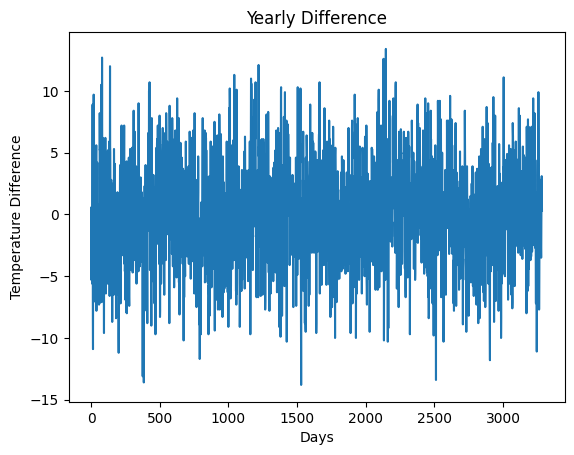

In [9]:
X = ds.values
diff = []

days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)

# plot the difference
plt.plot(diff)
plt.title("Yearly Difference")
plt.xlabel("Days")
plt.ylabel("Temperature Difference")
plt.show()

## model_differenced

## monthly_average